## Diamond Price Prediction

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)
https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

In [3]:
## Data Ingestions step
df=pd.read_csv('gemstone.csv')
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


### EDA and Feature Engineering

In [54]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [4]:
### No missing values present in the data

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [56]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [57]:
## Lets drop the id column
df=df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [58]:
## check for duplicated records
df.duplicated().sum()

0

In [59]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']

print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [60]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [61]:
df['cut'].value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

In [62]:
df['color'].value_counts()

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

In [63]:
df['clarity'].value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

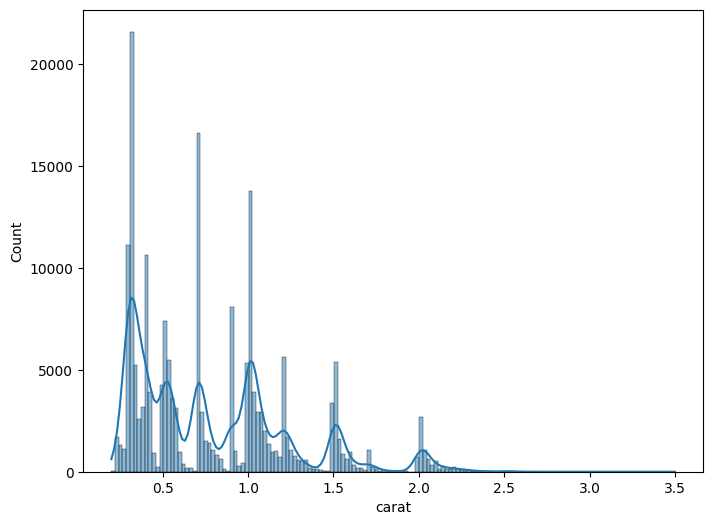

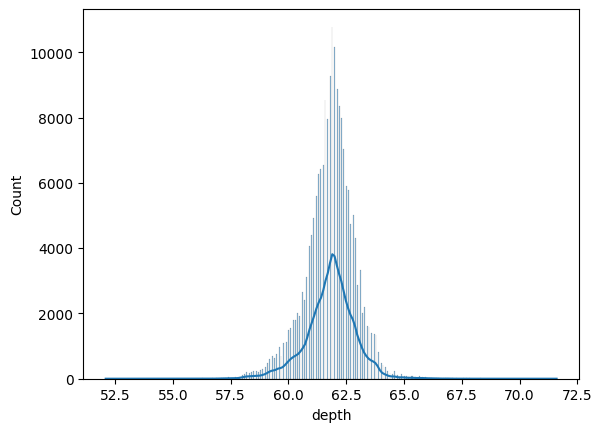

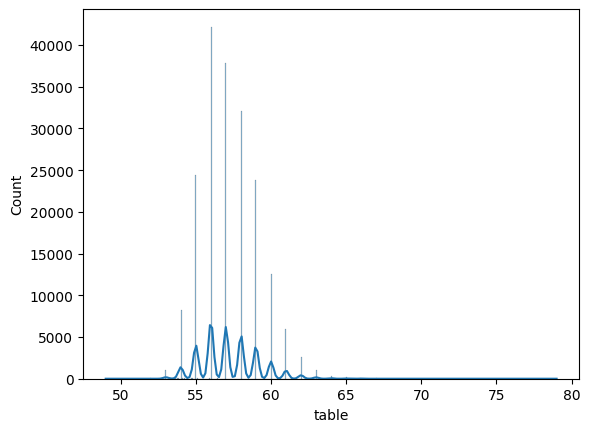

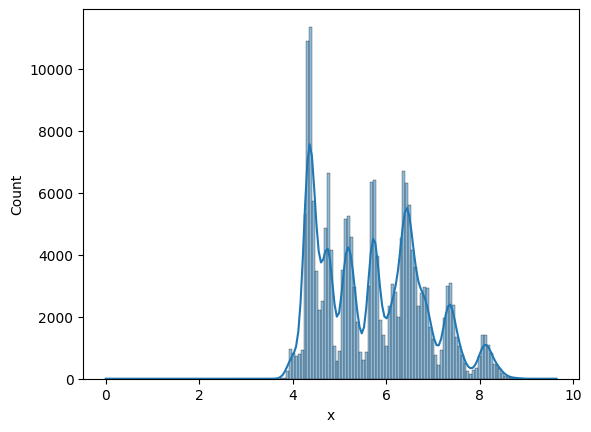

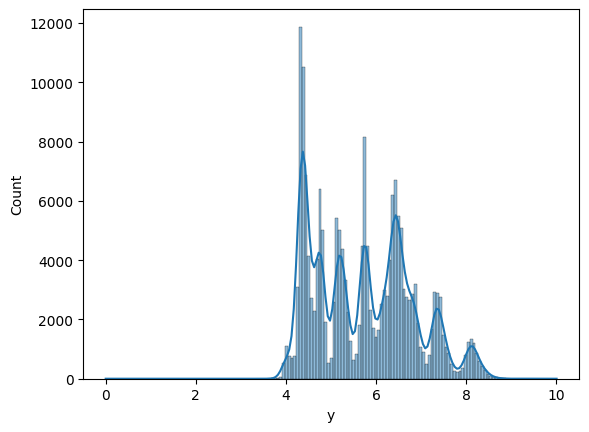

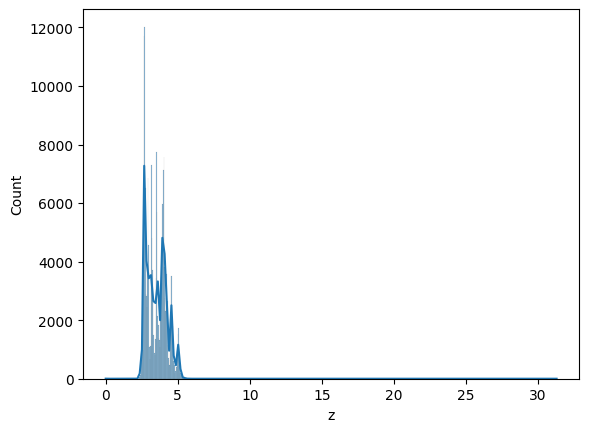

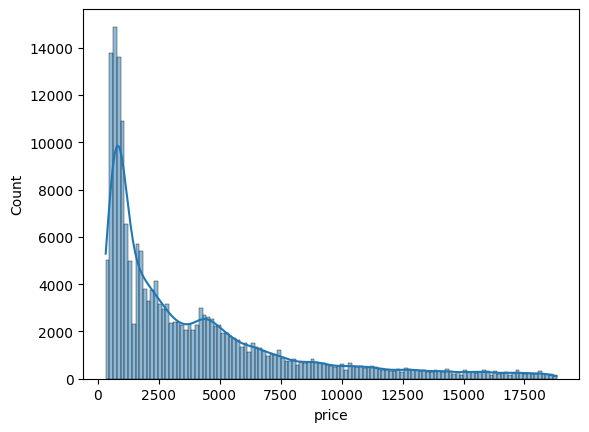

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [15]:
## Assignment Do the same for categorical data

<AxesSubplot: >

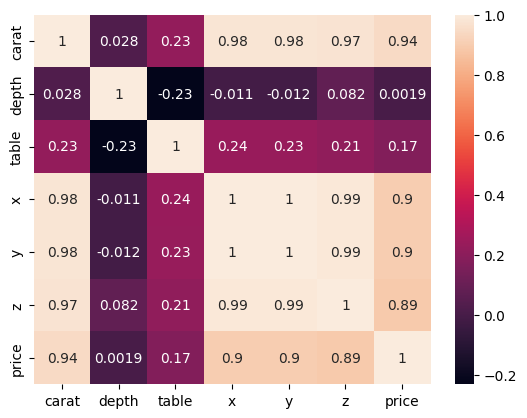

In [65]:
## correlation
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [66]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [67]:
## For Domain Purpose https://www.americangemsociety.org/ags-diamond-grading-system/
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [68]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [69]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [70]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [71]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [72]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [73]:
df['cut']=df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [74]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [26]:
# # droping x,y,z cols

# df= df.drop(labels=['x','y','z'],axis=1)

### Model Training

In [27]:
## Independent and dependent features

X = df.drop(labels=['price'],axis=1)
y = df[['price']]

In [28]:
y.head()

,price
0,13619
1,13387
2,2772
3,666
4,14453


In [29]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77


In [30]:
#Train Test Split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30,random_state=30)

In [31]:
X_train.shape,X_test.shape

((135501, 9), (58072, 9))

In [32]:
## Feature Selection based on correlaltion
X_train.corr()

,carat,cut,color,clarity,depth,table,x,y,z
carat,1.000000,-0.151887,0.289916,-0.348100,0.030080,0.225997,0.980467,0.980107,0.972516
cut,-0.151887,1.000000,-0.020501,0.186134,-0.247813,-0.480045,-0.148002,-0.148379,-0.169213
color,0.289916,-0.020501,1.000000,0.088890,0.037313,0.032545,0.266675,0.266793,0.267222
clarity,-0.348100,0.186134,0.088890,1.000000,-0.062403,-0.183678,-0.375109,-0.373423,-0.375497
depth,0.030080,-0.247813,0.037313,-0.062403,1.000000,-0.230617,-0.008943,-0.009873,0.083483
table,0.225997,-0.480045,0.032545,-0.183678,-0.230617,1.000000,0.238178,0.233933,0.212400
x,0.980467,-0.148002,0.266675,-0.375109,-0.008943,0.238178,1.000000,0.999074,0.988007
y,0.980107,-0.148379,0.266793,-0.373423,-0.009873,0.233933,0.999074,1.000000,0.987770
z,0.972516,-0.169213,0.267222,-0.375497,0.083483,0.212400,0.988007,0.987770,1.000000


<AxesSubplot: >

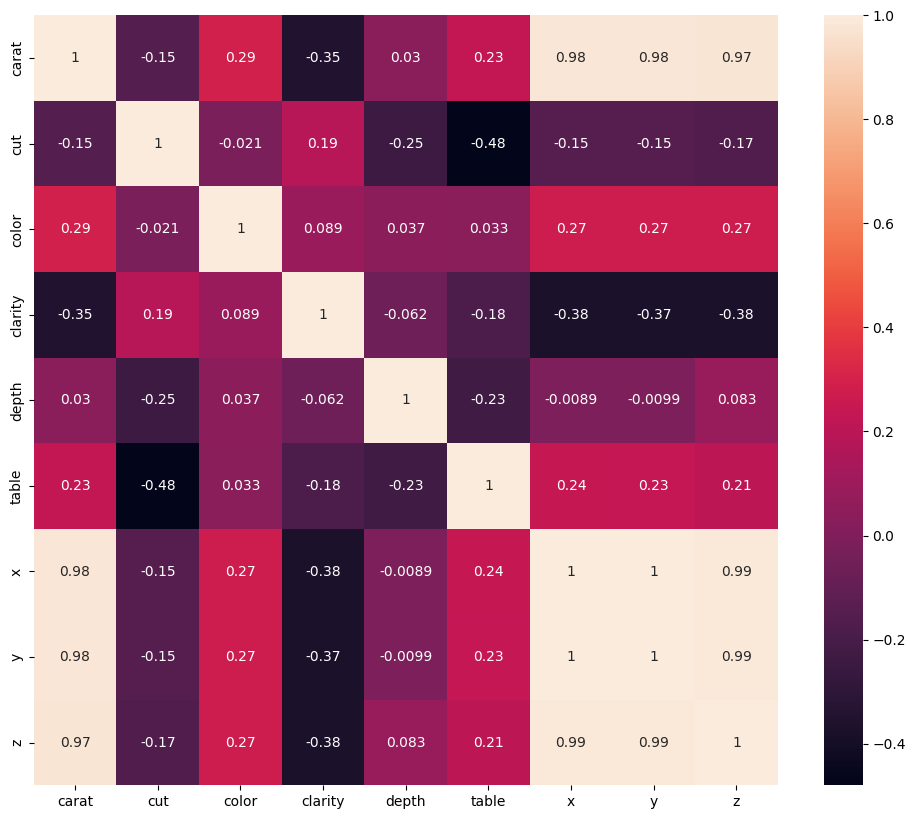

In [33]:
## Check for multicollinearity
plt.figure(figsize=(12,10))

corr= X_train.corr()
sns.heatmap(corr,annot=True)

In [34]:
### Linear regression Model

In [35]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [36]:
linear_reg.coef_

array([[13908.5914125 ,    72.89534931,  -283.5924305 ,   433.73822644,
         -122.8355985 ,   -36.71694327, -1550.78910628,  -452.96841314,
          -91.86321724]])

In [37]:
linear_reg.intercept_

array([13417.41178519])

### Evaluation

In [38]:
y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test, y_pred)
print("R-Squared :",r2_value)

RMSE : 1013.9047094344014
MAE : 674.0255115796725
R-Squared : 0.936890824856751


In [39]:
y_pred_train = linear_reg.predict(X_train)

mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train, y_pred_train )
print("R-Squared :",r2_value)

RMSE : 1015.3275630072727
MAE : 675.6337012111566
R-Squared : 0.9366402738974493


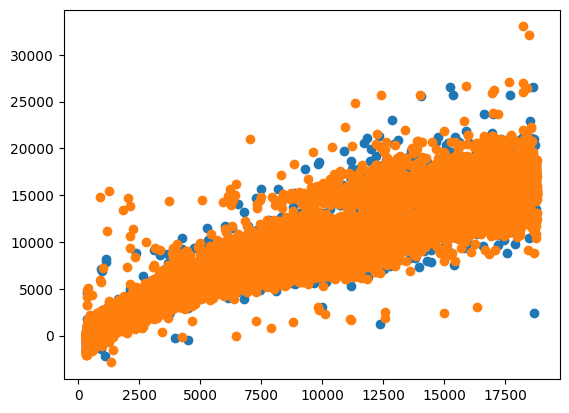

In [40]:
plt.scatter(y_test,y_pred)
plt.scatter(y_train,y_pred_train)

In [41]:
# single row testing

X_test[20:21]

,carat,cut,color,clarity,depth,table,x,y,z
45797,2.0,3,4,2,63.5,60.0,7.98,7.93,5.04


In [42]:
# prediction

linear_reg.predict(X_test[20:21])[0]

array([14752.98308863])

In [43]:
X_test[20:21].T

,45797
carat,2.00
cut,3.00
color,4.00
clarity,2.00
depth,63.50
table,60.00
x,7.98
y,7.93
z,5.04


In [44]:
column_names = X.columns.tolist()
column_names

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

In [45]:
X.shape[1]

9

In [46]:
linear_reg.n_features_in_

9

In [47]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [48]:
carat=2.00
cut='Very Good'     
color='G'      
clarity="SI2"   
depth=63.50
table=60.00
x=7.98
y=7.93
z=5.04

cut     = cut_map[cut]   
color   = color_map[color]     
clarity = clarity_map[clarity]

test_array = np.zeros([1,linear_reg.n_features_in_])
test_array[0,0] = carat
test_array[0,1] = cut
test_array[0,2] = color
test_array[0,3] = clarity
test_array[0,4] = depth
test_array[0,5] = table
test_array[0,6] = x
test_array[0,7] = y
test_array[0,8] = z

predicted_charges = np.around(linear_reg.predict(test_array)[0],3)
predicted_charges

array([14752.983])

### MODELs

In [49]:
with open('linear_regression.pkl','wb') as f:
    pickle.dump(linear_reg, f)

In [50]:
project_data = {"cut": cut_map,
                "color": color_map,
                "clarity": clarity_map,
                "Column Names" : column_names}

with open('proj_data.json','w') as f:
    json.dump(project_data, f)